<a href="https://colab.research.google.com/github/50leena/Credit-card-Fraud-detection-system/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline



In [78]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [79]:
df = pd.read_csv("/content/drive/MyDrive/Credit card fraud detection/creditcard.csv")

In [80]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [81]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [82]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [83]:
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]>

In [84]:
df.shape

(284807, 31)

In [85]:
df.isnull()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [86]:
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [87]:
df.Class.value_counts()

,count
Class,
0,284315
1,492


In [88]:
legit=df[df.Class==0]
fraud=df[df.Class==1]
print(legit.shape,fraud.shape)

(284315, 31) (492, 31)


DATA **SAMPLING**


In [89]:
legit_sample = legit.sample(n=492)

In [90]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [91]:
new_dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
65359,51544.0,1.252989,0.314053,0.318063,1.031318,-0.209588,-0.686862,0.100662,-0.161279,0.088217,...,-0.076667,-0.200691,-0.065405,0.017712,0.587173,-0.416807,0.021032,0.022394,6.95,0
256516,157737.0,2.341913,-1.292354,-1.166306,-1.644092,-0.949666,-0.506932,-1.041918,-0.205277,-1.245186,...,-0.196425,-0.054149,0.230360,0.458440,-0.102030,-0.177834,0.005324,-0.047994,10.00,0
46477,42804.0,1.140978,-0.264810,0.006420,0.062449,-0.459513,-0.855835,0.131158,-0.199225,0.259514,...,-0.211730,-0.863634,-0.027791,-0.090036,0.182536,0.838195,-0.108490,0.015410,99.95,0
107912,70673.0,-2.053720,0.061279,1.560670,-0.565205,-0.018064,1.810213,-0.253210,1.167537,-0.045644,...,0.325359,0.861073,-0.328430,-0.972849,0.040713,0.615420,-0.238667,-0.092210,106.00,0
232440,147169.0,1.788627,-2.121276,-1.765825,-1.334223,-1.401182,-1.422823,-0.268482,-0.450904,-1.493226,...,-0.162626,-0.792877,0.057906,-0.105438,-0.337598,-0.335639,-0.088853,-0.011749,302.00,0
95060,65150.0,-0.283939,1.355339,0.553398,0.255501,0.561040,-1.338352,1.056880,-0.229176,-0.738105,...,-0.076192,-0.211969,-0.256209,0.259185,0.096589,0.327896,0.021232,0.083294,0.76,0
94610,64952.0,-2.642014,1.808096,0.467250,-1.303610,-0.888046,-1.098657,-0.331491,0.834681,0.188070,...,-0.036918,-0.059883,-0.080206,0.611518,-0.330726,0.689620,0.259488,0.236768,7.30,0
87111,61541.0,1.210022,-0.551837,0.163436,-0.449755,-1.055053,-1.423718,0.056174,-0.396540,-1.200445,...,-0.724862,-1.868222,0.245864,0.689250,-0.077404,0.593140,-0.089965,0.028504,100.00,0
63715,50843.0,-1.392478,1.192584,0.286848,-2.959640,2.775996,3.246714,0.974131,-0.072125,1.732118,...,-0.568914,-0.496575,-0.237096,1.011887,-0.010416,0.618877,0.070601,-0.585917,0.77,0
57741,48049.0,-0.632365,0.602608,1.989526,0.329089,-0.382622,0.739667,-0.496907,0.305319,0.495975,...,0.344018,0.895636,-0.202575,-0.748077,-0.653908,0.589868,-0.238513,0.161205,2.99,0


In [92]:
new_dataset.shape

(984, 31)

In [93]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [94]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [96]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score ,confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

In [98]:
model = LogisticRegression()

In [99]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
#Model Evaluation
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [101]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9466327827191868


In [102]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [103]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9289340101522843


Confusion Matrix:
[[95  4]
 [10 88]]


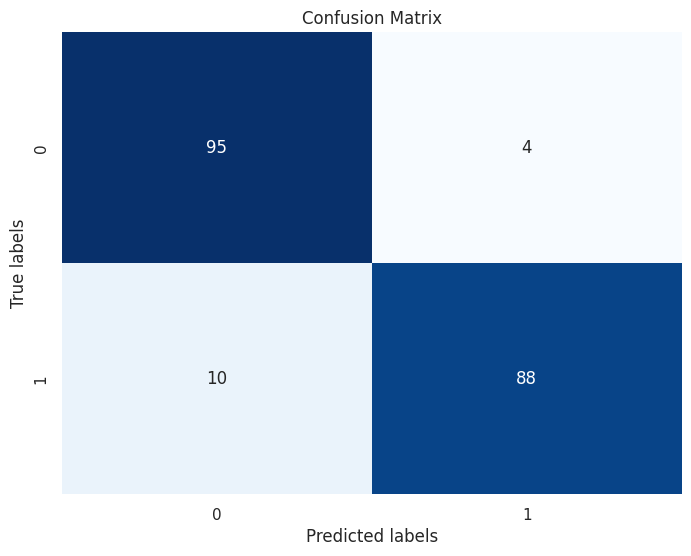

In [104]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Y_test are the true labels and X_test_prediction are the predicted labels
# Replace Y_test and X_test_prediction with your actual true and predicted labels
matrix = confusion_matrix(Y_test, X_test_prediction)

print("Confusion Matrix:")
print(matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# matrix = confusion_matrix(Y_test,X_test_prediction )

# print(matrix)


In [105]:
from sklearn.metrics import f1_score, recall_score
recall = recall_score(Y_test,X_test_prediction, average=None)
print(recall[0])
print(recall[1])
precision_class_0 = precision_score(Y_test,X_test_prediction, pos_label=0)
precision_class_1 = precision_score(Y_test, X_test_prediction, pos_label=1)

print("Precision for Class 0:", precision_class_0)
print("Precision for Class 1:", precision_class_1)
from sklearn.metrics import classification_report

print(classification_report(X_test_prediction,Y_test))


0.9595959595959596
0.8979591836734694
Precision for Class 0: 0.9047619047619048
Precision for Class 1: 0.9565217391304348
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       105
           1       0.90      0.96      0.93        92

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [106]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import classification_report

print(classification_report(y_pred,Y_test))

Accuracy: 0.8730964467005076
              precision    recall  f1-score   support

           0       1.00      0.80      0.89       124
           1       0.74      1.00      0.85        73

    accuracy                           0.87       197
   macro avg       0.87      0.90      0.87       197
weighted avg       0.91      0.87      0.88       197



Confusion Matrix:
[[99  0]
 [25 73]]


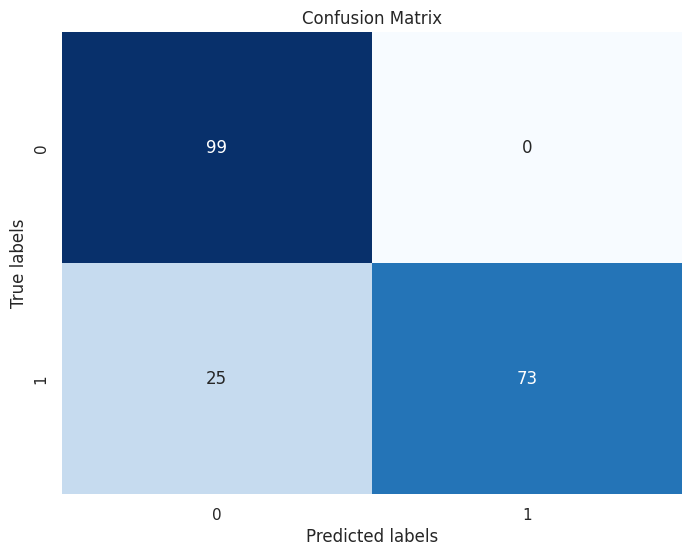

[[99  0]
 [25 73]]


In [107]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Y_test are the true labels and X_test_prediction are the predicted labels
# Replace Y_test and X_test_prediction with your actual true and predicted labels
matrix = confusion_matrix(Y_test,y_pred )

print("Confusion Matrix:")
print(matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

matrix = confusion_matrix(Y_test,y_pred )

print(matrix)

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,Y_train)

DecisionTreeClassifier()

[Text(0.4683641975308642, 0.95, 'x[14] <= -2.106\ngini = 0.5\nsamples = 787\nvalue = [393, 394]'),
 Text(0.3425925925925926, 0.85, 'x[1] <= 2.025\ngini = 0.006\nsamples = 343\nvalue = [1, 342]'),
 Text(0.40547839506172845, 0.8999999999999999, 'True  '),
 Text(0.31790123456790126, 0.75, 'gini = 0.0\nsamples = 342\nvalue = [0, 342]'),
 Text(0.36728395061728397, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5941358024691358, 0.85, 'x[4] <= 1.692\ngini = 0.207\nsamples = 444\nvalue = [392, 52]'),
 Text(0.53125, 0.8999999999999999, '  False'),
 Text(0.4166666666666667, 0.75, 'x[7] <= 1.07\ngini = 0.128\nsamples = 393\nvalue = [366, 27]'),
 Text(0.2654320987654321, 0.65, 'x[14] <= -0.812\ngini = 0.086\nsamples = 354\nvalue = [338, 16]'),
 Text(0.12345679012345678, 0.55, 'x[0] <= 65757.5\ngini = 0.305\nsamples = 48\nvalue = [39, 9]'),
 Text(0.07407407407407407, 0.45, 'x[18] <= 0.417\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.04938271604938271, 0.35, 'x[22] <= 0.578\ngi

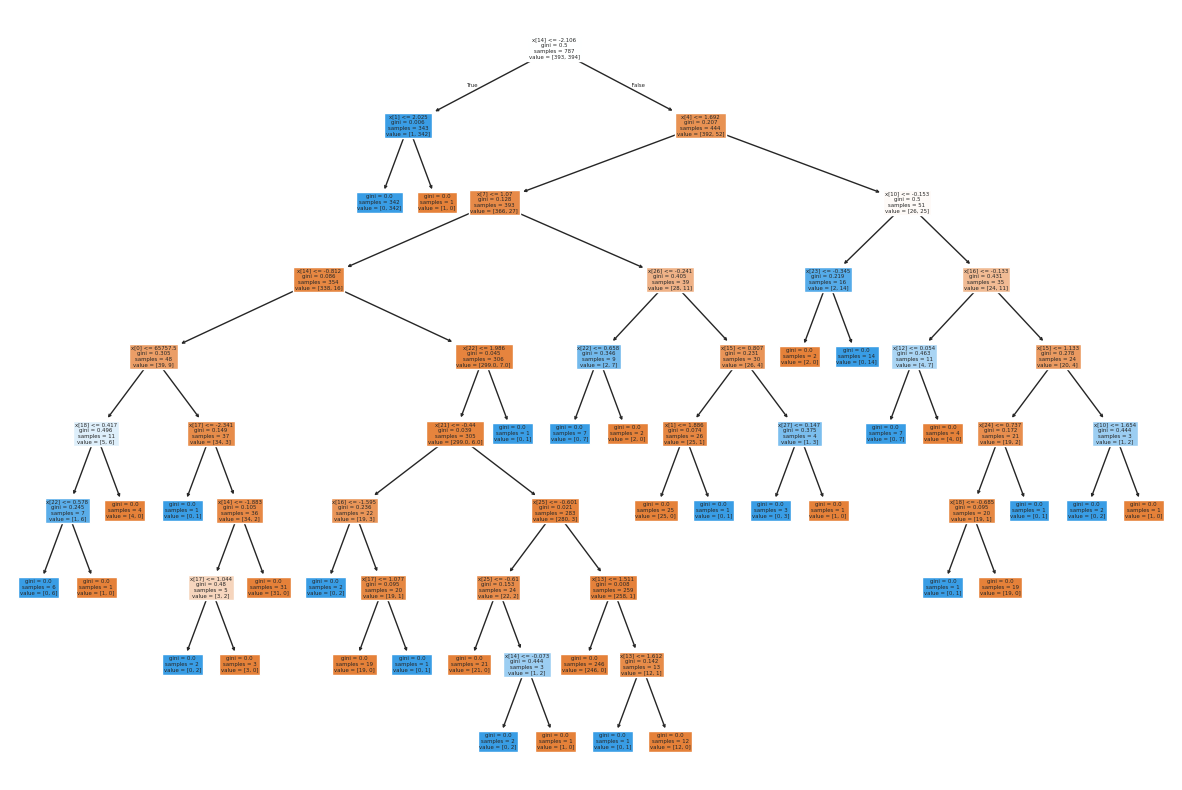

In [110]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [111]:
y_pred = treemodel.predict(X_test)

In [112]:
from sklearn.metrics import classification_report
score = accuracy_score(y_pred,Y_test)
print(score)

0.9035532994923858


              precision    recall  f1-score   support

           0       0.93      0.88      0.91       104
           1       0.88      0.92      0.90        93

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197

Confusion Matrix:
[[92  7]
 [12 86]]


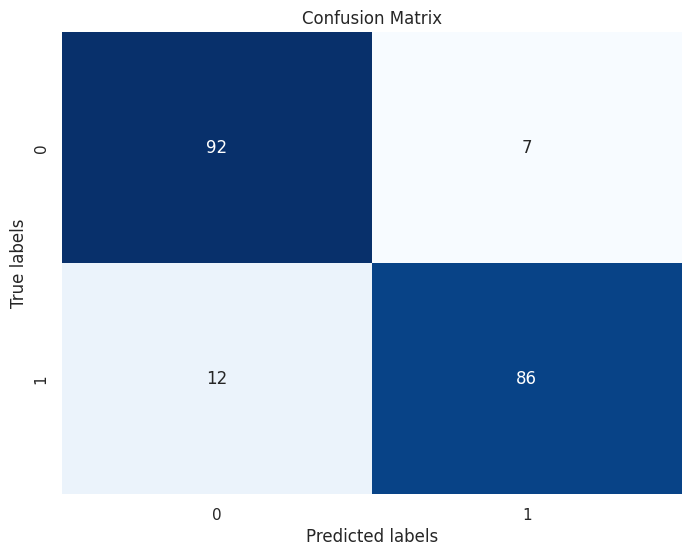

[[92  7]
 [12 86]]


In [113]:
print(classification_report(y_pred,Y_test))
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



matrix = confusion_matrix(Y_test,y_pred )

print("Confusion Matrix:")
print(matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

matrix = confusion_matrix(Y_test,y_pred )

print(matrix)

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [116]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


score = accuracy_score(Y_test,y_pred)
print(score)


0.6040609137055838


              precision    recall  f1-score   support

           0       0.56      0.62      0.59        89
           1       0.65      0.59      0.62       108

    accuracy                           0.60       197
   macro avg       0.60      0.61      0.60       197
weighted avg       0.61      0.60      0.60       197

Confusion Matrix:
[[55 44]
 [34 64]]


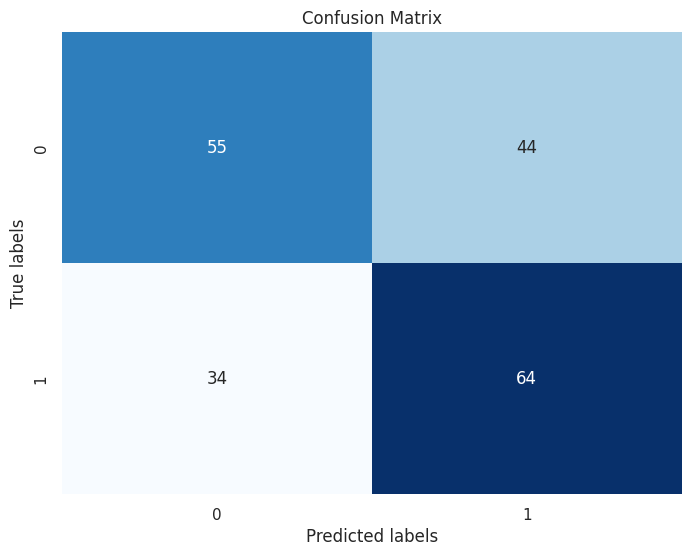

[[55 44]
 [34 64]]


In [117]:
print(classification_report(y_pred,Y_test))
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



matrix = confusion_matrix(Y_test,y_pred )

print("Confusion Matrix:")
print(matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

matrix = confusion_matrix(Y_test,y_pred )

print(matrix)

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [119]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, Y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy is: " ,accuracy)
# Evaluating the classifier
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

Accuracy is:  0.9187817258883249
Confusion Matrix:
[[97  2]
 [14 84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        99
           1       0.98      0.86      0.91        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



              precision    recall  f1-score   support

           0       0.98      0.87      0.92       111
           1       0.86      0.98      0.91        86

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197

Confusion Matrix:
[[97  2]
 [14 84]]


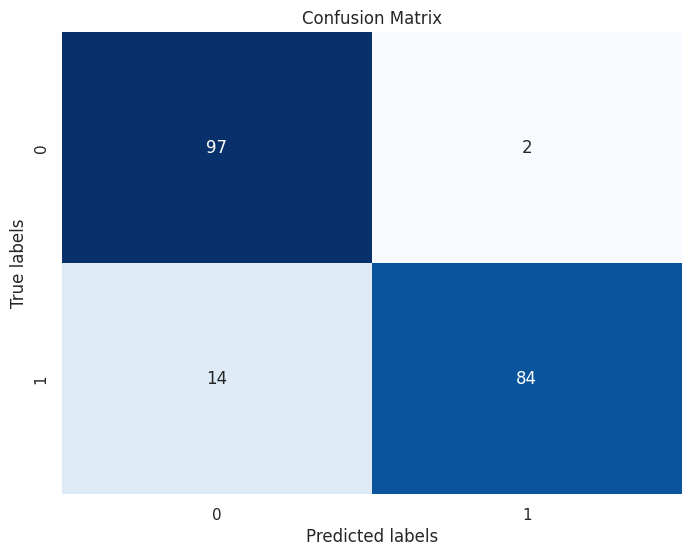

[[97  2]
 [14 84]]


In [120]:
print(classification_report(y_pred,Y_test))
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



matrix = confusion_matrix(Y_test,y_pred )

print("Confusion Matrix:")
print(matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

matrix = confusion_matrix(Y_test,y_pred )

print(matrix)

OverSAMPLINg

In [121]:
df_legit = legit.sample(n=20000)

In [122]:
df_legit.shape

(20000, 31)

In [123]:
new_data_over = pd.concat([df_legit,fraud],axis=0)
new_data_over.shape

(20492, 31)

In [124]:
X = new_data_over.drop(columns='Class', axis=1)
Y = new_data_over['Class']
print(X.shape,Y.shape)

(20492, 30) (20492,)


In [125]:
from imblearn.over_sampling import SMOTE
resampled_x, resampled_y = SMOTE().fit_resample(X,Y) # reshaping data

print('X New Shape: ', resampled_x.shape)
print('Y New Shape: ', resampled_y.shape)

X New Shape:  (40000, 30)
Y New Shape:  (40000,)


In [126]:
(X_train,X_test,Y_train,Y_test) = train_test_split(resampled_x, resampled_y, test_size=0.2)

In [127]:
print(X.shape,X_train.shape,X_test.shape)

(20492, 30) (32000, 30) (8000, 30)


In [128]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print(test_data_accuracy)

0.970375


In [130]:
from sklearn.metrics import classification_report

print(classification_report(X_test_prediction,Y_test))
matrix = confusion_matrix(Y_test,X_test_prediction )

print(matrix)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4077
           1       0.96      0.98      0.97      3923

    accuracy                           0.97      8000
   macro avg       0.97      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000

[[3920   80]
 [ 157 3843]]


In [66]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import classification_report

print(classification_report(y_pred,Y_test))

Accuracy: 0.9515
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4332
           1       0.91      0.99      0.95      3668

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000



In [67]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,Y_train)

DecisionTreeClassifier()

[Text(0.280109128423068, 0.9772727272727273, 'x[14] <= -1.862\ngini = 0.5\nsamples = 32000\nvalue = [15976, 16024]'),
 Text(0.06518333720120678, 0.9318181818181818, 'x[4] <= -0.184\ngini = 0.054\nsamples = 15125\nvalue = [424, 14701]'),
 Text(0.1726462328121374, 0.9545454545454546, 'True  '),
 Text(0.0074263170109074034, 0.8863636363636364, 'x[17] <= -3.008\ngini = 0.267\nsamples = 202\nvalue = [170, 32]'),
 Text(0.0037131585054537017, 0.8409090909090909, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.011139475516361104, 0.8409090909090909, 'x[4] <= -0.547\ngini = 0.173\nsamples = 188\nvalue = [170, 18]'),
 Text(0.0074263170109074034, 0.7954545454545454, 'gini = 0.0\nsamples = 130\nvalue = [130, 0]'),
 Text(0.014852634021814807, 0.7954545454545454, 'x[19] <= 0.236\ngini = 0.428\nsamples = 58\nvalue = [40, 18]'),
 Text(0.0074263170109074034, 0.75, 'x[29] <= 178.654\ngini = 0.102\nsamples = 37\nvalue = [35, 2]'),
 Text(0.0037131585054537017, 0.7045454545454546, 'gini = 0.0\nsample

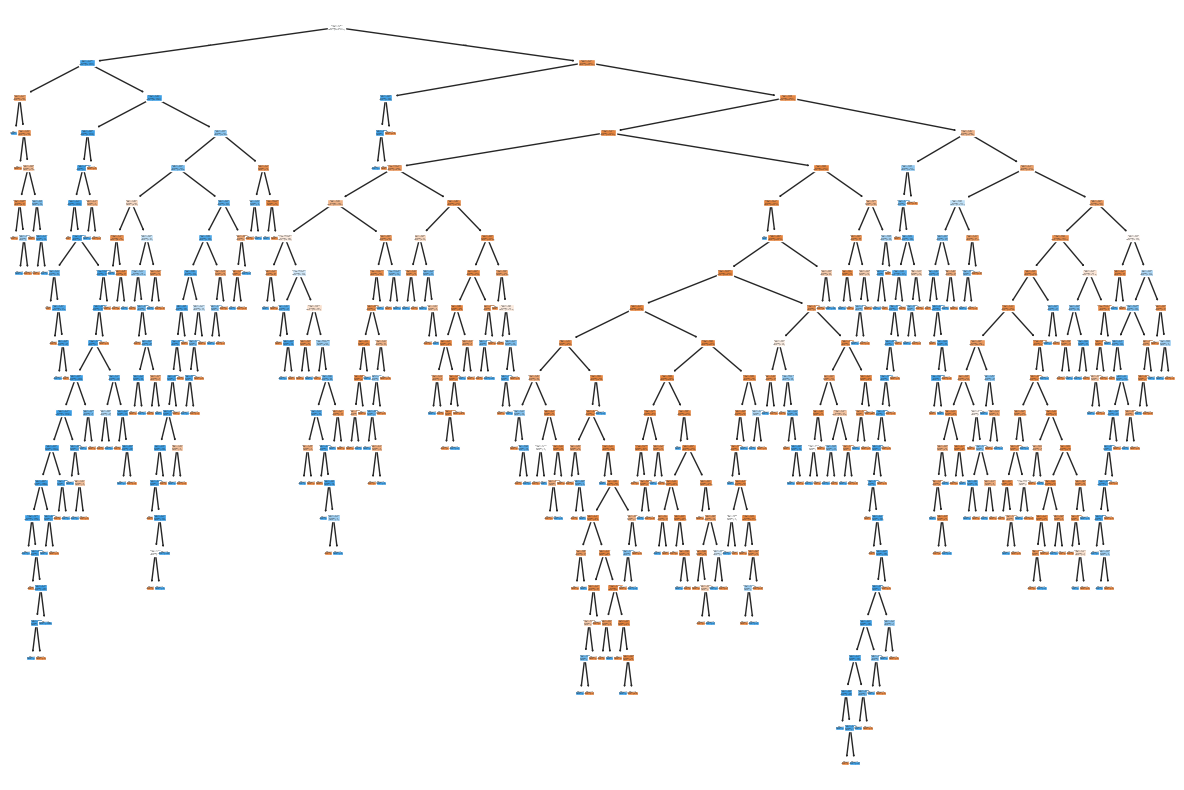

In [68]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred = treemodel.predict(X_test)
from sklearn.metrics import classification_report
score = accuracy_score(y_pred,Y_test)
print(score)

In [ ]:
print(classification_report(y_pred,Y_test))
matrix = confusion_matrix(Y_test,y_pred )

print(matrix)

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(Y_test,y_pred)
cm
score = accuracy_score(Y_test,y_pred)
print(score)
print(classification_report(Y_test,y_pred))

0.875625
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4024
           1       0.91      0.83      0.87      3976

    accuracy                           0.88      8000
   macro avg       0.88      0.88      0.88      8000
weighted avg       0.88      0.88      0.88      8000



In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [75]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, Y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy is: " ,accuracy)
# Evaluating the classifier
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

Accuracy is:  0.99775
Confusion Matrix:
[[4019    5]
 [  13 3963]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4024
           1       1.00      1.00      1.00      3976

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4032
           1       1.00      1.00      1.00      3968

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Confusion Matrix:
[[4019    5]
 [  13 3963]]


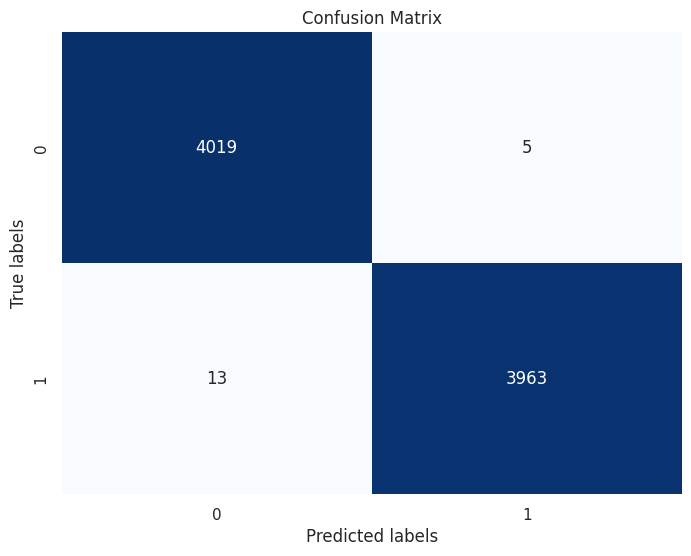

[[4019    5]
 [  13 3963]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4032
           1       1.00      1.00      1.00      3968

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Confusion Matrix:
[[4019    5]
 [  13 3963]]


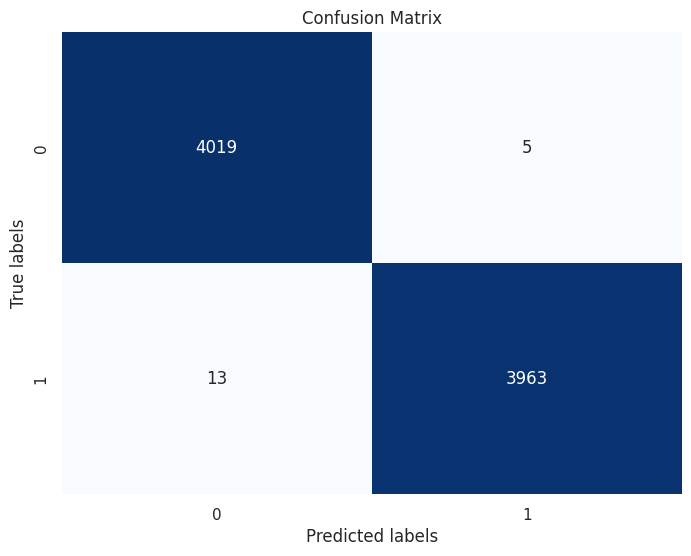

[[4019    5]
 [  13 3963]]


In [76]:
print(classification_report(y_pred,Y_test))
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



matrix = confusion_matrix(Y_test,y_pred )

print("Confusion Matrix:")
print(matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

matrix = confusion_matrix(Y_test,y_pred )

print(matrix)